In [22]:
import sys
sys.path.append('../../../')

from configs.data_configs.pendulum import data_configs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
conf = data_configs()

In [65]:

train = pd.read_parquet(conf.train_path)
reconstruction = pd.read_parquet(reconstructed_path)

In [66]:
reconstruction

,event_time,trx_count,flag,pad_category,0,1,10,100,101,102,...,91,92,93,94,95,96,97,98,99,pendulum_id
0,"[0.02276900690048933, 0.0766913266852498, 0.10...",55,1.258945,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.9977598190307617, 0.9993470311164856, 1.001...","[1.0038039684295654, 0.9991380572319031, 1.004...","[0.9968757629394531, 0.9985032081604004, 0.996...","[1.004339575767517, 1.0025115013122559, 1.0046...","[1.0014522075653076, 1.0076298713684082, 1.000...","[1.0020924806594849, 1.0008764266967773, 0.998...",...,"[1.0015801191329956, 1.0003716945648193, 1.000...","[1.005328893661499, 1.000429391860962, 1.00034...","[0.9974333047866821, 1.0024876594543457, 0.994...","[1.0095375776290894, 1.0035604238510132, 1.003...","[1.0006601810455322, 1.0009595155715942, 1.001...","[1.002655029296875, 1.0012935400009155, 0.9995...","[1.00019109249115, 0.9985335469245911, 1.00006...","[1.0014972686767578, 1.0006076097488403, 1.001...","[1.000628113746643, 0.9982180595397949, 0.9993...",0
1,"[0.026337546296417713, 0.08113790303468704, 0....",73,0.734597,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.9977007508277893, 0.9992926120758057, 1.001...","[1.0045206546783447, 0.9998002648353577, 1.004...","[0.9967478513717651, 0.998278021812439, 0.9964...","[1.004260778427124, 1.0027531385421753, 1.0045...","[1.0010792016983032, 1.0077630281448364, 1.001...","[1.0025423765182495, 1.0011200904846191, 0.998...",...,"[1.0017704963684082, 1.0004581212997437, 1.000...","[1.0045514106750488, 1.0005333423614502, 1.000...","[0.998104453086853, 1.0032970905303955, 0.9956...","[1.0099055767059326, 1.003464698791504, 1.0030...","[1.0006604194641113, 1.0008740425109863, 1.001...","[1.0025798082351685, 1.0011979341506958, 0.999...","[1.0009613037109375, 0.9987464547157288, 1.000...","[1.0013171434402466, 1.0004276037216187, 1.001...","[1.0011508464813232, 0.9985800981521606, 0.999...",1
2,"[0.026562537532299757, 0.08540078997612, 0.117...",52,1.627227,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.9976967573165894, 0.9992017149925232, 1.001...","[1.0040323734283447, 0.9988797307014465, 1.004...","[0.9973108768463135, 0.9986436367034912, 0.996...","[1.0043305158615112, 1.0024824142456055, 1.004...","[1.0018131732940674, 1.0078356266021729, 1.001...","[1.001842737197876, 1.0010173320770264, 0.9985...",...,"[1.0015263557434082, 1.0003666877746582, 1.000...","[1.005140781402588, 0.9998535513877869, 0.9997...","[0.9966873526573181, 1.0024025440216064, 0.994...","[1.0097436904907227, 1.0038645267486572, 1.003...","[1.0009779930114746, 1.0013073682785034, 1.001...","[1.0029661655426025, 1.001678705215454, 0.9999...","[1.0002706050872803, 0.9984700083732605, 1.000...","[1.0019534826278687, 1.000835657119751, 1.0020...","[1.0010404586791992, 0.9986377954483032, 0.999...",2
3,"[0.023152329958975315, 0.07397765293717384, 0....",44,4.919584,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.9975647330284119, 0.9992668032646179, 1.001...","[1.0058610439300537, 1.00040864944458, 1.00565...","[0.9974044561386108, 0.9992873668670654, 0.997...","[1.0039265155792236, 1.0023655891418457, 1.004...","[1.0017588138580322, 1.0080962181091309, 1.001...","[1.0034186840057373, 1.0014451742172241, 0.998...",...,"[1.0017344951629639, 1.0004754066467285, 1.000...","[1.005091905593872, 1.000556468963623, 1.00039...","[0.9977647662162781, 1.0025787353515625, 0.995...","[1.0107635259628296, 1.0040162801742554, 1.003...","[1.0007786750793457, 1.000921368598938, 1.0015...","[1.0027849674224854, 1.0013798475265503, 0.999...","[1.0003619194030762, 0.9988335371017456, 1.000...","[1.001230001449585, 1.000343918800354, 1.00146...","[1.0006158351898193, 0.9983259439468384, 0.999...",3
4,"[0.0187581405043602, 0.06925482302904129, 0.09...",57,2.176808,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[0.9976575374603271, 0.9993398189544678, 1.001...","[1.0041394233703613, 0.9990763068199158, 1.004...","[0.9973143339157104, 0.999127984046936, 0.9973...","[1.0042

In [125]:
def plot_random_sample(df, number_of_plots):
    idx = np.random.choice(df.index)
    random_row = df.loc[idx]
    X = random_row[[str(i) for i in range(256)]].values
    l = random_row['flag']
    images = np.vstack(X).T
    start_idx = np.random.randint(0, len(images)-number_of_plots, 1)[0]
    print(l)
    for idx in range(start_idx, start_idx + number_of_plots):
        image = images[idx]
        # Display the black and white image
        plt.figure()
        time = random_row['event_time'][idx]
        plt.title('Time: {}'.format(time))
        plt.imshow(image.reshape(16, 16), cmap='gray', vmin=0, vmax=1)
        #plt.axis('off')
        plt.show()

2.6746895407428526


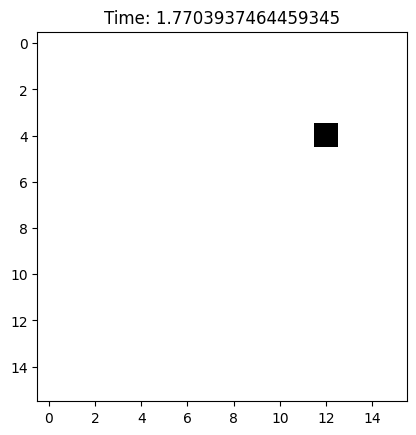

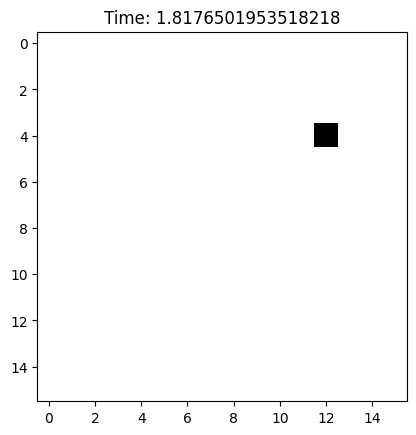

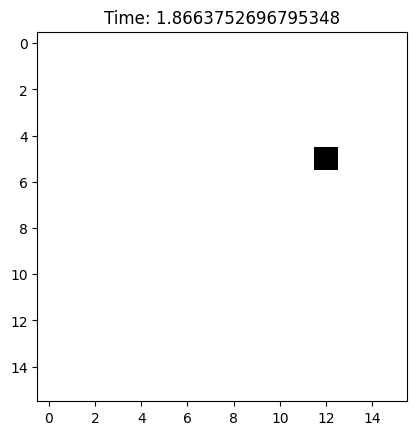

In [126]:
plot_random_sample(train, 3)

In [130]:
true_path = conf.train_path
generated_path = '/home/event_seq/experiments/pendulum/ckpt/test3-our-gru-TR/seed_0/generated_data.parquet'
reconstructed_path = '/home/event_seq/experiments/pendulum/ckpt/test3-our-gru-TR/seed_0/reconstructed_data.parquet'


train = pd.read_parquet(true_path)
gen = pd.read_parquet(generated_path)
recon = pd.read_parquet(reconstructed_path)


In [148]:
train.head(100)

,event_time,flag,trx_count,pad_category,0,1,2,3,4,5,...,247,248,249,250,251,252,253,254,255,pendulum_id
0,"[0.13104168214982265, 0.1820877353198933, 0.24...",3.410063,66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1000
1,"[0.20827797029396422, 0.2181321774140568, 0.22...",2.955339,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1001
2,"[0.01411070047419062, 0.022368007199248367, 0....",4.759534,59,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1002
3,"[0.005538543209031433, 0.14506006802163415, 0....",1.732009,65,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1003
4,"[0.26051873971601397, 0.3286675131906328, 0.56...",4.536249,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(0.5, 1.02, 'Length: 4.068948280509789')

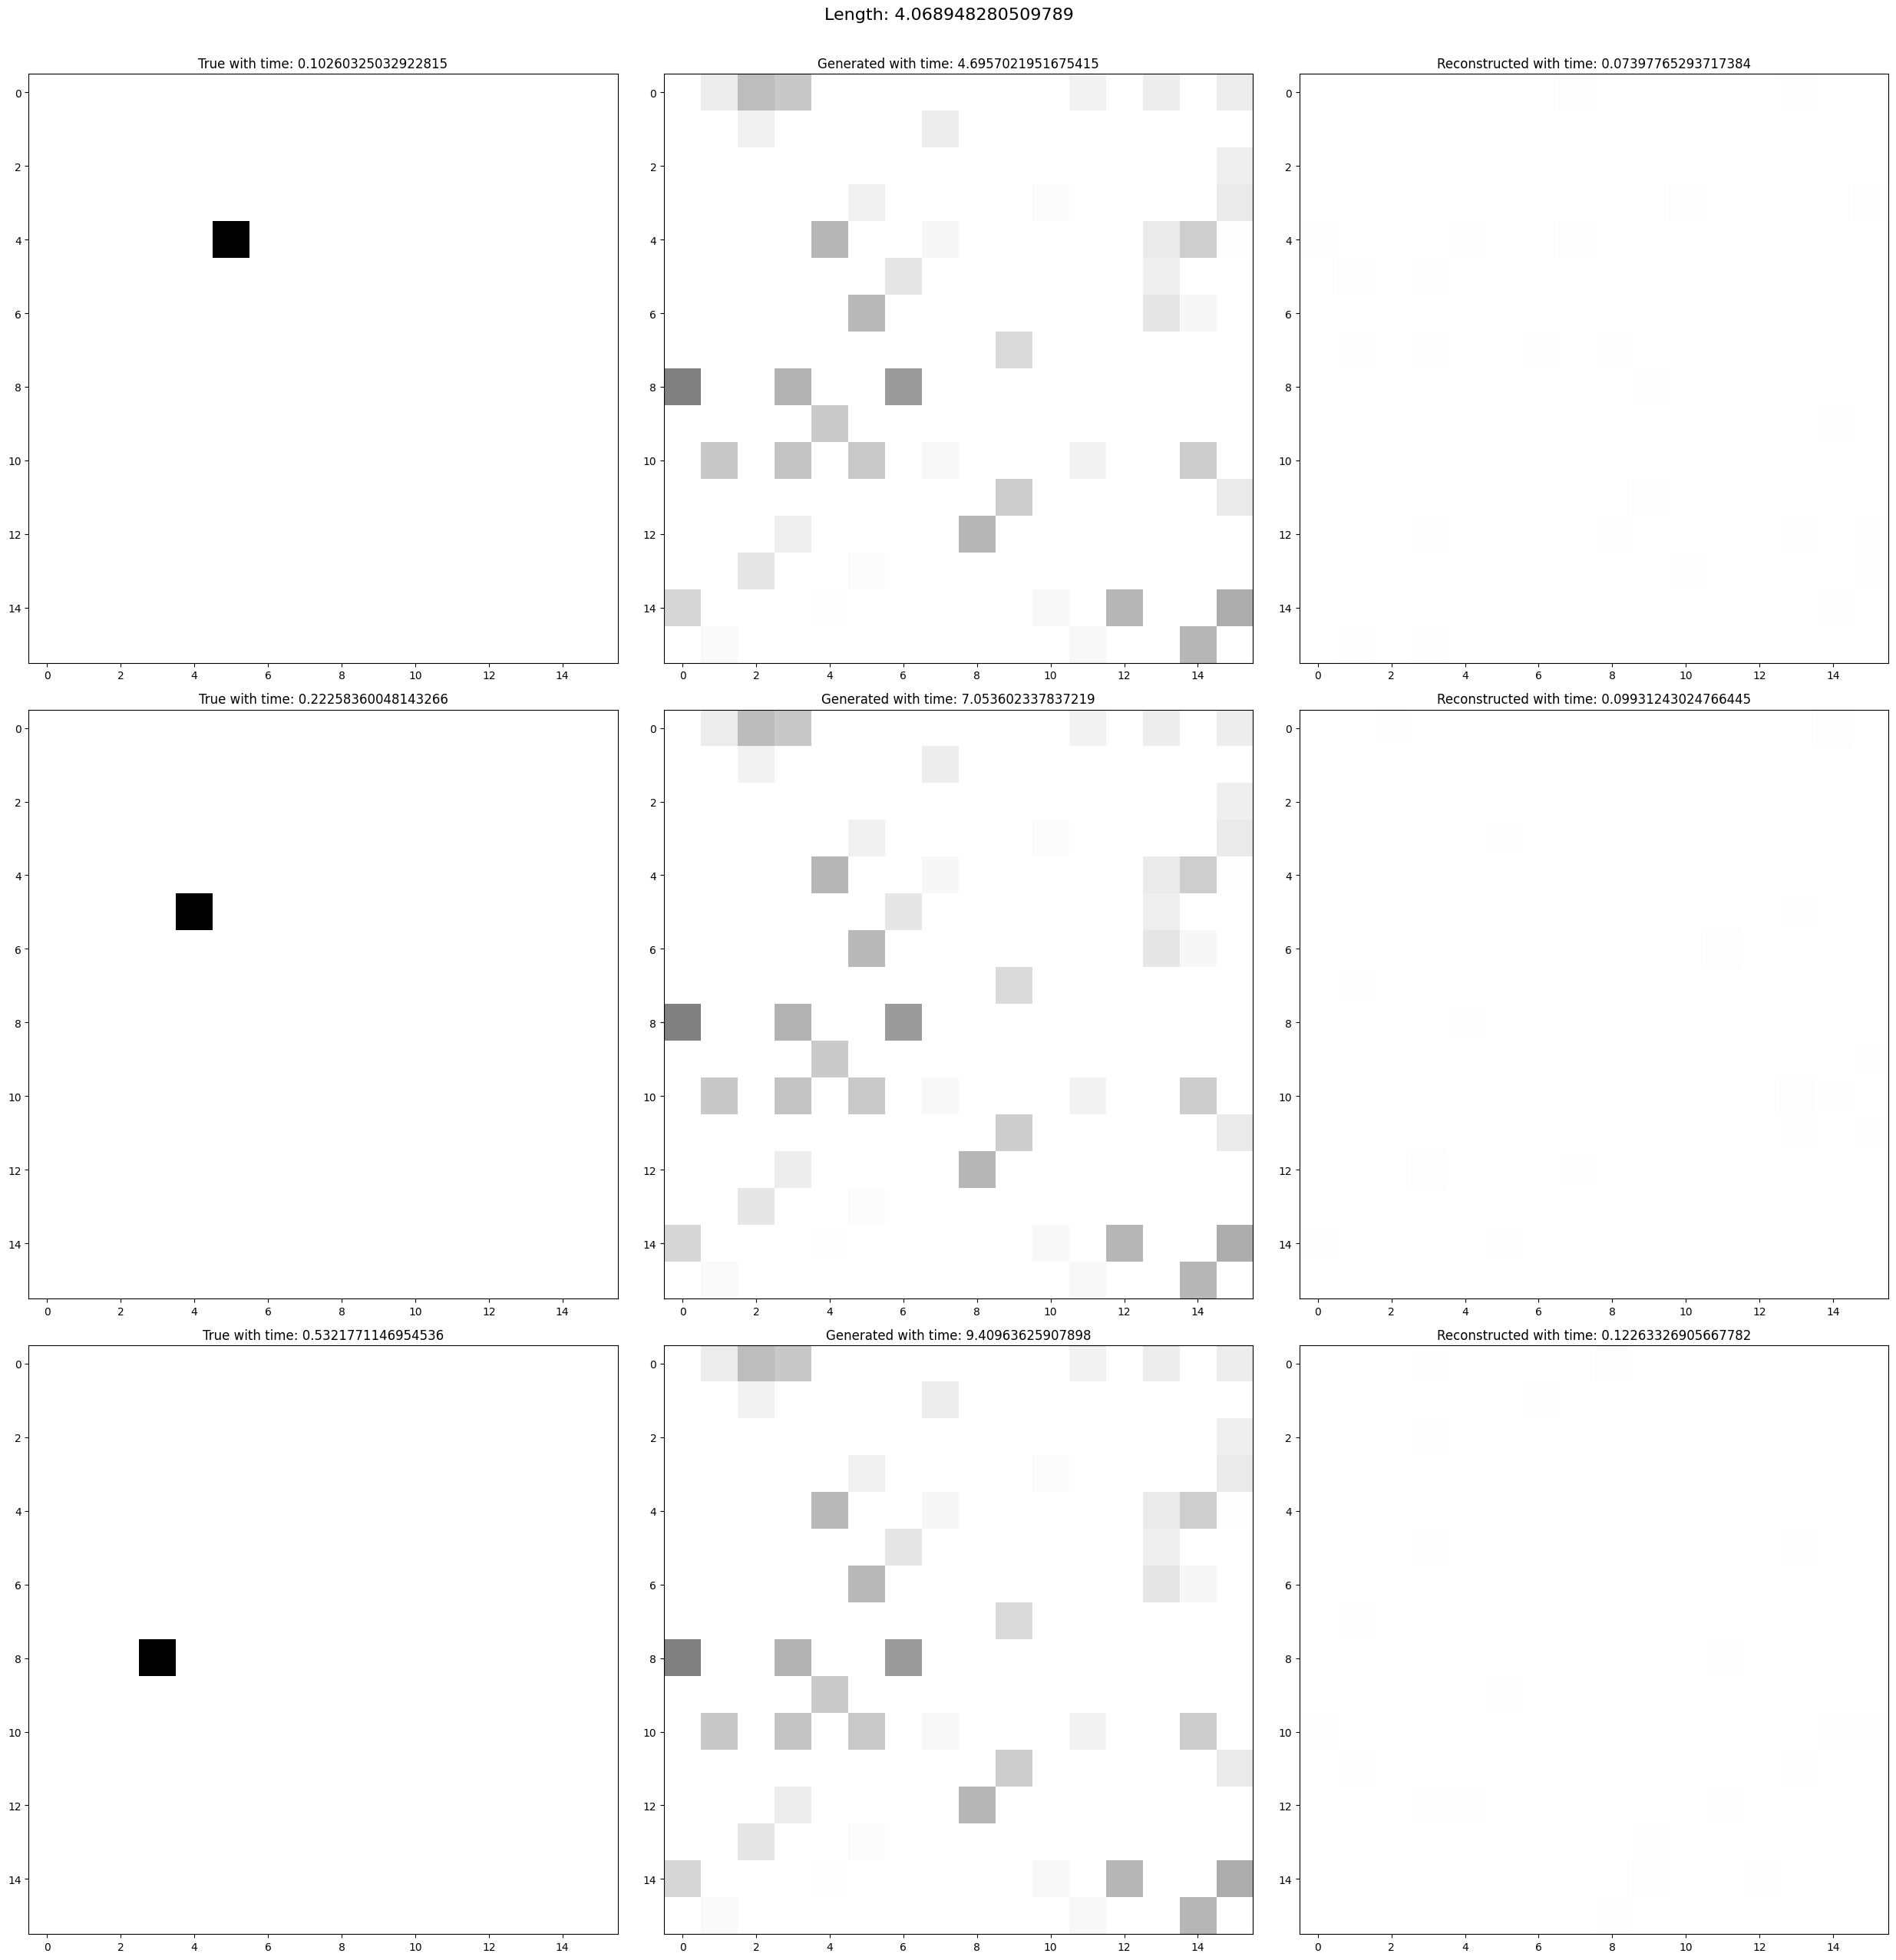

In [145]:
train.index = np.arange(len(train))
dataframes = [train, gen, recon]
names = ["True", "Generated", "Reconstructed"]
num_plots = 3
idx = np.random.choice(train.index)
l = train['flag'][idx]

start_idx = np.random.randint(0, train.loc[idx]['trx_count'] - num_plots, 1)[0]

fig, axs = plt.subplots(num_plots, len(dataframes), figsize=(25, 25))

for i, df in enumerate(dataframes):

    random_row = df.loc[idx]
    X = random_row[[str(i) for i in range(256)]].values
    images = np.vstack(X).T
    for j, idx in enumerate(range(start_idx, start_idx + num_plots)):
        image = images[idx]
        ax = axs[j, i]
        ax.imshow(image.reshape(16, 16), cmap='gray', vmin=0, vmax=1)

        time = random_row['event_time'][idx]
        ax.set_title(f"{names[i]} with time: {time}")

# Adjust spacing between subplots
plt.tight_layout()
fig.suptitle(f"Length: {l}", fontsize=16, y=1.02)

In [133]:
train['flag'][idx]

3.7202300212355417

In [71]:
row = reconstruction.loc[1000]

In [72]:
X = row[[str(i) for i in range(256)]].values

In [108]:
images = np.vstack(X).T

In [109]:
image = images[2].reshape(16, 16)

In [106]:
image[0][0] = 0

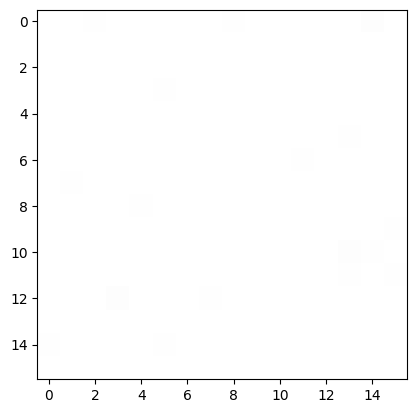

In [110]:
# Display the black and white image
plt.figure()
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
#plt.axis('off')
plt.show()

In [4]:

def pendulum(t, thetas, g, l):
    theta, dot_theta = thetas # y0, y1
    dots = (dot_theta, -(g/l)*np.sin(theta))
    return  dots # y0_dot, y1_dot

def create_dataset(n_datapoints, timesteps, dt, angles_bound, length_bound, g):
    min_angle, max_angle = angles_bound
    min_len, max_len = length_bound
    
    tmin = 0.0
    tmax = timesteps*dt
    ts = np.linspace(tmin, tmax, timesteps)

    labels = [] # np.empty(n_datapoints) #
    cartesian = np.empty((n_datapoints, timesteps, 2)) # 2d of motion
    phase_space = np.empty((n_datapoints, timesteps, 2)) # 2 degrees of freedom

    for i in range(n_datapoints):
        initial_angle = (max_angle - min_angle) * np.random.random_sample() + min_angle 
        theta0 = np.radians(initial_angle) # initial anglee
        omega0 = 0.0 # initial velocity

        length = (max_len - min_len) * i/(n_datapoints-1) + min_len
        sol = solve_ivp(pendulum, [tmin, tmax], [theta0, omega0], t_eval = ts, args=(g,length))

        # save the x, y coordinated of the pendulum
        xy = np.zeros_like(sol.y)
        xy[0] = length*np.sin(sol.y[0])
        xy[1] = length*np.cos(sol.y[0])
        cartesian[i] = xy.T

        phase_space[i] = sol.y.T

        labels.append({'initial_angle': initial_angle, 
                       'initial_velocity': omega0, 
                       'gravity': g, 
                       'length': length})

        if i % 500 == 0:
            print(i, length, initial_angle)
    dataset = {'cartesian': cartesian, 'phase_space': phase_space, 'labels': labels}
    return dataset

# Train & In-Dist Test Set

In [5]:
dt = 0.01
timesteps = 2000
angles_bound = (10, 170)
g = 9.81
ang_str = '-'.join([str(a) for a in angles_bound])

In [19]:
length_bound = (1.0, 1.5)
n_datapoints = 10
dataset_train = create_dataset(n_datapoints, timesteps, dt, angles_bound, length_bound, g)
len_str = '-'.join([f'{a:.2f}' for a in length_bound])
dd.io.save(f'../data/pendulum_n_{n_datapoints}_steps_{timesteps}_dt_{dt}_len_{len_str}_angle_{ang_str}_g_{g}.hd5', dataset_train)

0 1.0 137.04849050660266


/usr/local/lib/python3.10/dist-packages/deepdish/io/hdf5io.py:125: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  elif x.dtype == np.object:


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [15]:
dataset_train['cartesian'].shape

(10, 2000, 2)

In [18]:
dataset_train['phase_space'].shape

(10, 2000, 2)

# Test set 1

In [ ]:
length_bound = (0.90, 1.00)
n_datapoints = 1000
dataset_test1 = create_dataset(n_datapoints, timesteps, dt, angles_bound, length_bound, g)
len_str = '-'.join([f'{a:.2f}' for a in length_bound])
dd.io.save(f'../data/pendulum_n_{n_datapoints}_steps_{timesteps}_dt_{dt}_len_{len_str}_angle_{ang_str}_g_{g}.hd5', dataset_test1)

0 0.9 159.09978933331283
500 0.95005005005005 78.38651833296461


# Test set 2

In [7]:
length_bound = (1.50, 1.60)
n_datapoints = 1000
dataset_test2 = create_dataset(n_datapoints, timesteps, dt, angles_bound, length_bound, g)
len_str = '-'.join([f'{a:.2f}' for a in length_bound])
dd.io.save(f'../data/pendulum_n_{n_datapoints}_steps_{timesteps}_dt_{dt}_len_{len_str}_angle_{ang_str}_g_{g}.hd5', dataset_test2)

0 1.5 22.093442472969613
500 1.55005005005005 59.910835489055486
